In [1]:
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
df  = pd.read_csv('alaskaPCA.csv')
df

,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m
0,RGI2000-v7.0-G-01-00001,1,01-01,G204091E67414N,392889,624,2008-09-02T00:00:00,-155.909404,67.413726,5,...,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,COPDEM30,725
1,RGI2000-v7.0-G-01-00002,1,01-01,G204121E67419N,392890,624,2008-09-02T00:00:00,-155.879114,67.419232,5,...,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,COPDEM30,484
2,RGI2000-v7.0-G-01-00003,1,01-01,G204471E67431N,392897,624,2008-09-02T00:00:00,-155.530786,67.431484,5,...,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,COPDEM30,1099
3,RGI2000-v7.0-G-01-00004,1,01-01,G204497E67431N,392899,624,2008-09-02T00:00:00,-155.501948,67.430514,5,...,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,COPDEM30,652
4,RGI2000-v7.0-G-01-00005,1,01-01,G204521E67429N,392901,624,2008-09-02T00:00:00,-155.478173,67.432873,5,...,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,COPDEM30,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,RGI2000-v7.0-G-01-27505,1,01-06,G232055E58382N,419220,624,2005-08-15T00:00:00,-127.943494,58.381563,9,...,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,COPDEM30,757
27505,RGI2000-v7.0-G-01-27506,1,01-06,G232006E58375N,419219,624,2005-08-15T00:00:00,-127.994907,58.374932,9,...,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,COPDEM30,915
27506,RGI2000-v7.0-G-01-27507,1,01-06,G231997E58381N,419218,624,2005-08-15T00:00:00,-128.003487,58.380406,9,...,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,COPDEM30,714
27507,RGI2000-v7.0-G-01-27508,1,01-06,G231855E58382N,419215,624,2005-08-15T00:00:00,-128.146532,58.381816,9,...,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,COPDEM30,489


In [3]:

df1 = df[['zmean_m','slope_deg','aspect_deg','area_km2']]
len(df1)

27509

In [4]:
# Drop outliers using the 2.5th and 97.5th percentiles for each column in df1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lower = df1.quantile(0.025)
upper = df1.quantile(0.975)
df1_percentile_filtered = df1[
    ((df1 >= lower) & (df1 <= upper)).all(axis=1)
]
df1_percentile_filtered.head()

# Normalize the filtered dataframe
arr_df1_percentile_filtered = scaler.fit_transform(df1_percentile_filtered)
arr_df1_percentile_filtered

array([[ 0.01519426, -1.07792539,  1.30024264, -0.40134049],
       [-0.54890954, -0.69872021,  1.32552224, -0.50709364],
       [-0.27999104, -0.04795795, -1.43758193, -0.41909784],
       ...,
       [ 0.90885133,  0.40901274,  1.35035066, -0.44213077],
       [ 1.4471651 ,  0.26339072, -0.95998972, -0.46963591],
       [-2.01646715, -0.71327075, -1.49946322, -0.49122055]])

In [5]:
pca = PCA(n_components=4)


In [6]:
arr = pca.fit_transform(arr_df1_percentile_filtered)
arr.shape


(22854, 4)

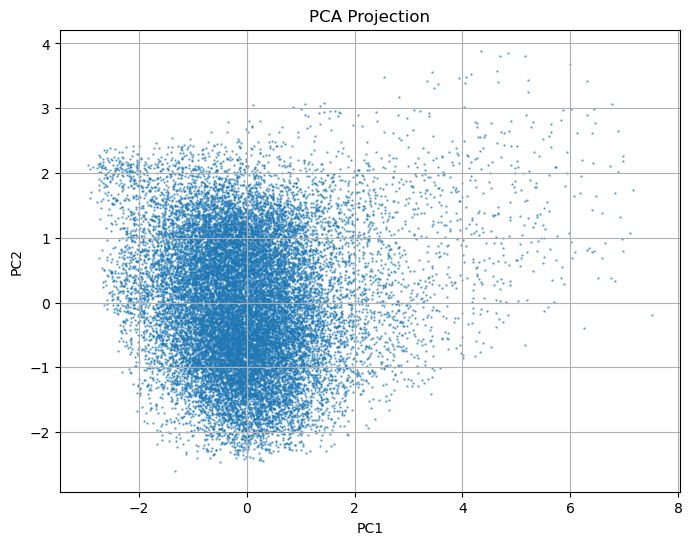

In [7]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.scatter(arr[:, 0], arr[:, 1], s=0.5, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

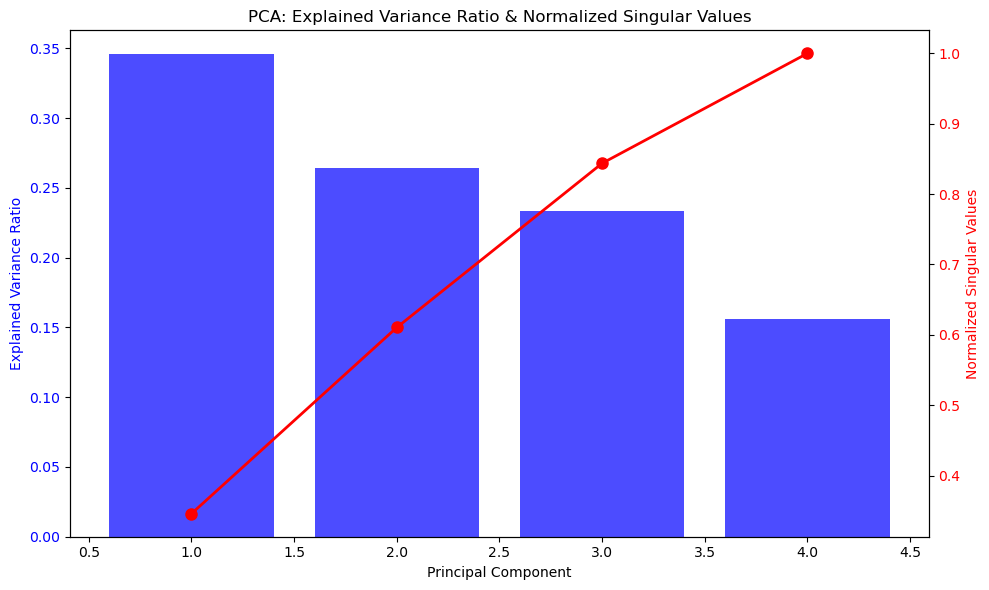

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot explained variance ratio as bars
x_pos = range(1, len(pca.explained_variance_ratio_) + 1)
ax1.bar(x_pos, pca.explained_variance_ratio_, alpha=0.7, color='blue', label='Explained Variance Ratio')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for normalized singular values
ax2 = ax1.twinx()
normalized_singular = pca.singular_values_ / pca.singular_values_.max()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         'ro-', linewidth=2, markersize=8)
ax2.set_ylabel('Normalized Singular Values', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('PCA: Explained Variance Ratio & Normalized Singular Values')
fig.tight_layout()
plt.show()